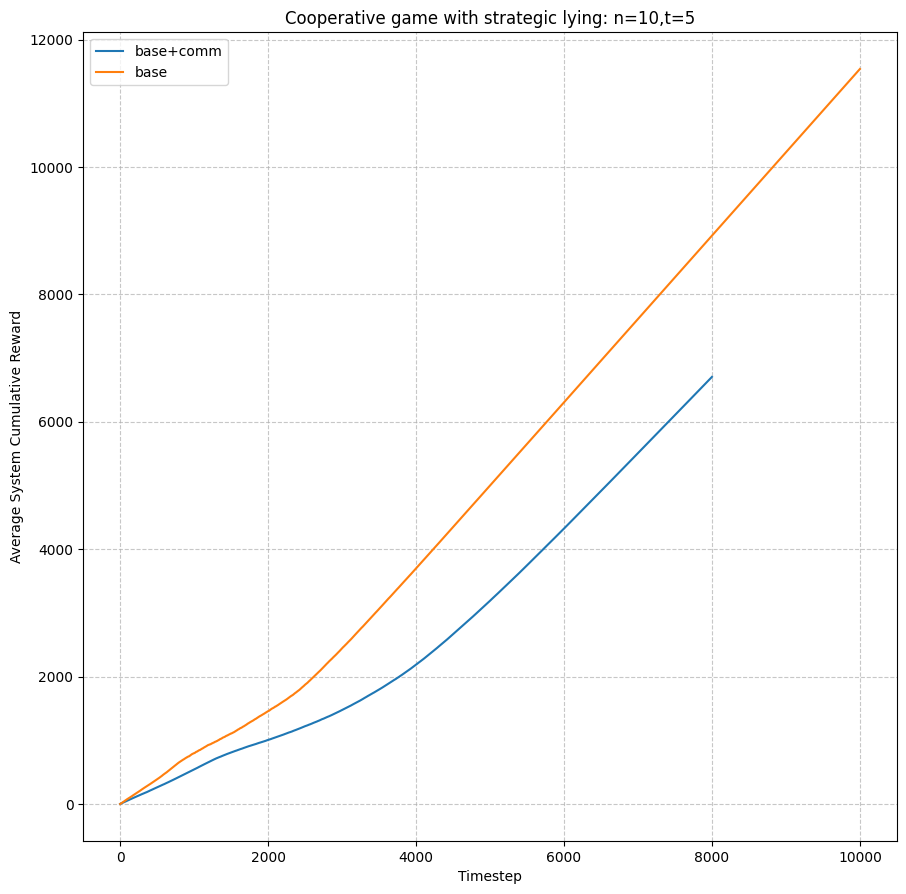

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# set parameters
n = 10
t = 5

# load simulation results
cum_rew_1 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_bc.npy')
cum_rew_2 = np.load(f'data/base/n{n}t{t}_cum_rew_cnf0.npy')

# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
cum_rew_2= np.mean(cum_rew_2, axis=0)

# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')

plt.plot(cum_rew_1, label='base+comm')
plt.plot(cum_rew_2, label='base')

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

Converged actions: [1.92 1.9  1.88 1.33 1.87 0.11 1.97 1.78 1.82 1.91]


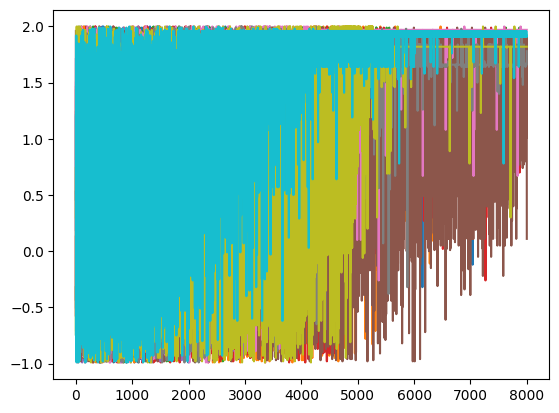

In [21]:
actions_1 = np.load(f'data/base_comm/n{n}t{t}_actions_bc.npy')

print(f'Converged actions: {actions_1[-1,:]}')

plt.plot(actions_1)

In [22]:
struct_1 = np.load(f'data/base/n{n}t{t}_cstruct_cnf0.npy')

sets_list = [set([i+1 for i, val in enumerate(row) if val == 1]) for row in struct_1]
print(sets_list)



[{1, 2, 6, 9}, set(), {3, 4, 5, 7, 8, 10}, set(), set()]


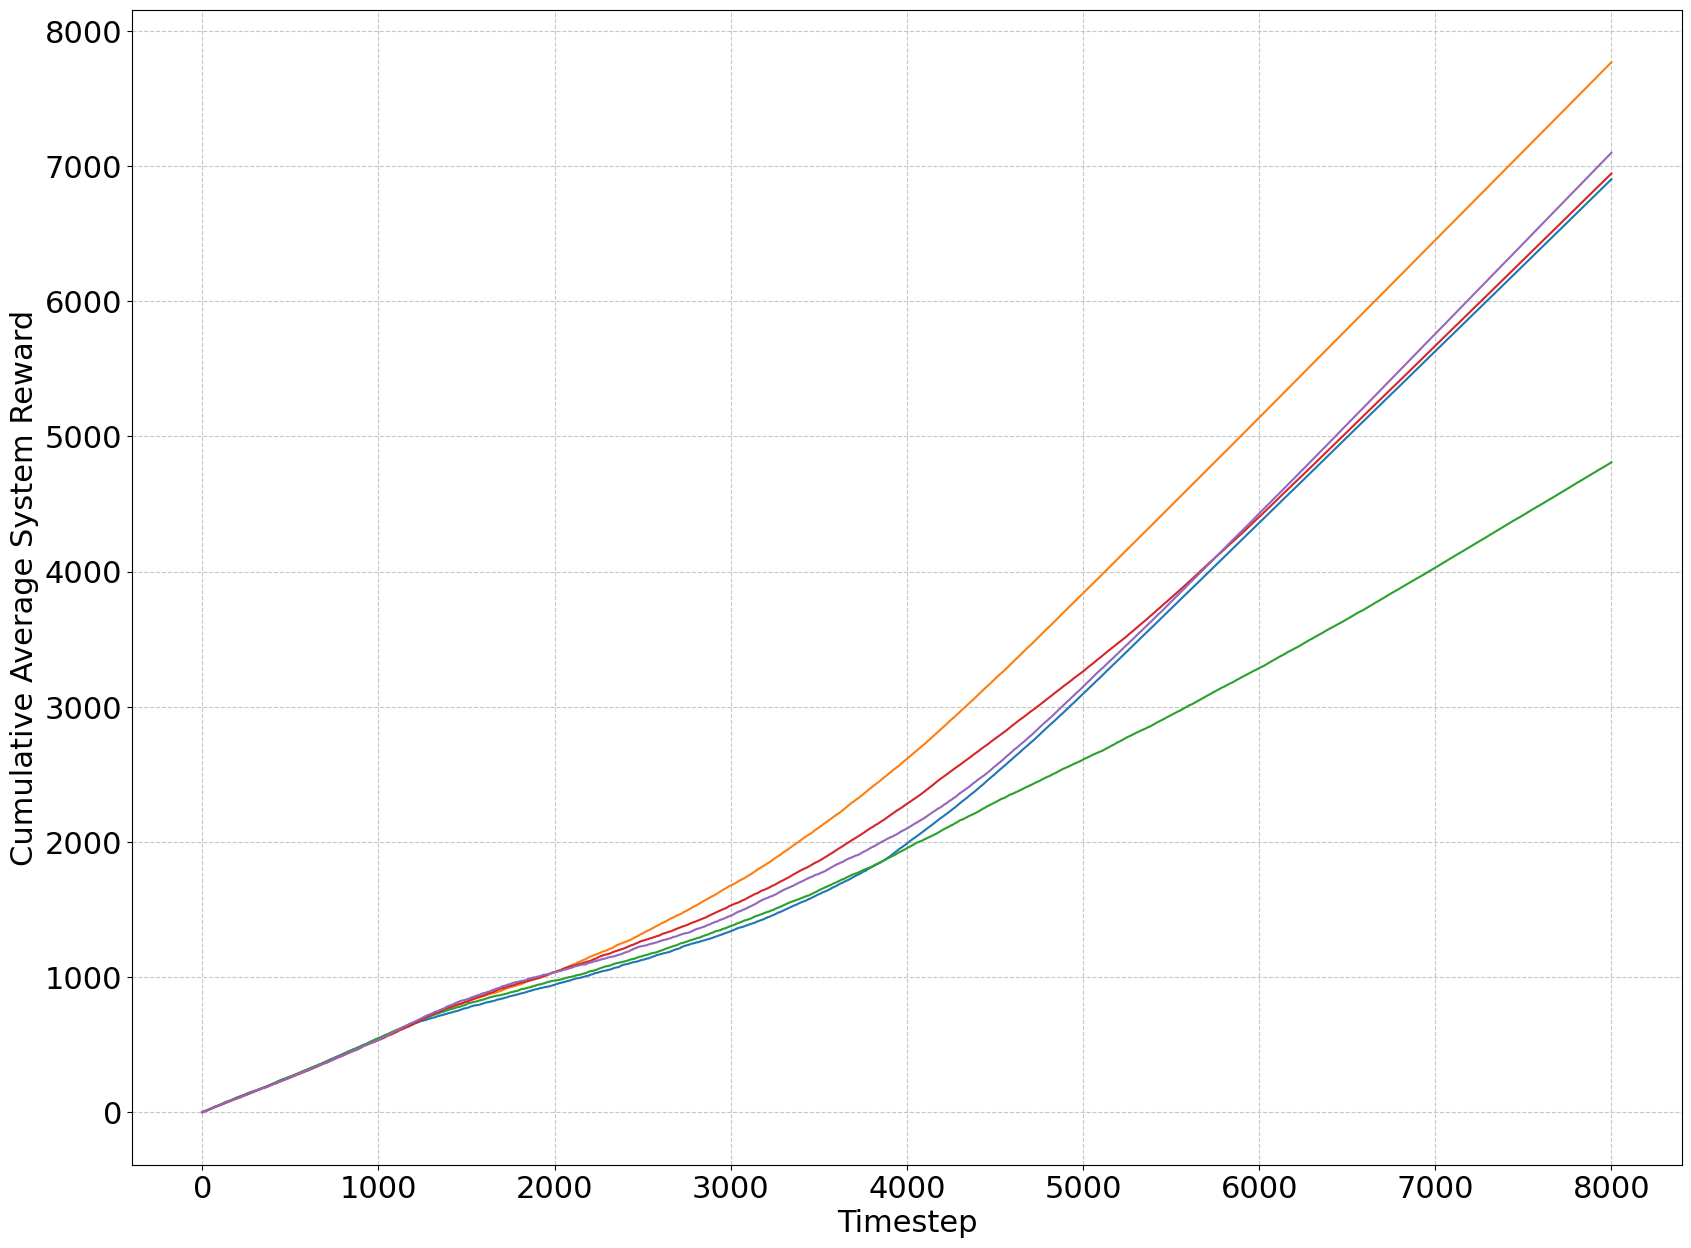

In [29]:
# comparing multiple runs

for i in range(5):
    cum_rew_1 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_bc.npy')
    arr = cum_rew_1[i,:]
    plt.plot(arr)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestep', fontsize=22)
plt.ylabel('Cumulative Average System Reward', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.savefig("n10t5solutionscomparison.png")